In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data Preprocessing - Cleaning Data, Transforming Data and making Data ready for Building
# models.
# 1) Check for Duplicate columns or variables. info(), head, tail 

# 2) Identify null columns or Zero Data columns. info()

# 3) Missing Value Treatment - Imputation of Missing values is critical as it has a direct
# effect on the machine learning models.

# Manual Methods of Missing Value Imputation
# If a variable or column has more than 70% missing values and it is a critical column, then
# missing values must be imputed incase of Non Numeric Categorical Data with "Missing" or
# "NotAvailable" and if it is numeric variable create a missing code like 9999, etc.
# If a variable or column has more than 70% missing values and it is not a critical column
# delete the column.

# If a variable or column has less than 70% missing values and if it is
# Numeric Variable - Impute with Mean or Median
# Non Numeric Categorical Variable - Impute with Mode or most frequent

# The above methods are manual methods which do not take into consideration impact of other
# variables on the missing values during imputation

# Algorithm Based Missing Value Imputations - This method evaluates the impact of other 
# variables on missing value and accordingly impute the missing value.
# Multivariate Imputation using Chained Equations (MICE) - Imputes both Numeric and Non Numeric
# Categorical data effectively and widely used method. python (IterativeImputer)
# KNNImputer - Uses K Nearest Neighbors Algorithm for Missing value imputation and works
# only with numeric data

# 4) Data Transormation - Transforming Data into a new type
# Dependent Variable (y) is the variable that is being predicted and if it has
# Positive Skewness - Logarthmic Transformation or Square Root Transformation
# Negative Skewness - Exponential Transformation or Power Transformation

# Independent Variables(X's) are those variables that are used for predicting dependnet var(y)
# Numeric Independent Variables in different units like discrete value, tens, hundreds,
# thousands, lakhs, millions, etc.
# For Example House Data - Price(lakhs), Size of House(thousands), number of bathrooms(2),
# parking lot (50sft), etc. For bringing all values into a range Scaling must be implemented

# Standardization or Standard Scaler = (x-mean)/stddeviation or Z Scores. Scale data into
# both positive and negative numbers within a range

# Normalization of Min Max Scaler = (X-Xmin)/(Xmax-Xmin) scales date into a range of 0 to 1
# with only positive values.

# Robust Scaler = (X-Q2)/(Q3-Q1) scales data into both positive and negative values and 
# used when there are many outliers in the data

# 5) Dummy Variable Encoding or Assigning Numeric Identifiers to Levels/Classes/Groups in
# Non Numeric Categorical Data. There must not be any single character or string must be there
# when data is being sent into Machine Learning Models.
# Independent Variables (X's)
# Gender           - Male, Female, Female, Female, Male, Male, Female
# pd.get_dummies() will create new columns equivalent to as many levels/classes in categorical
# variable and uses Binary Encoding (Yes-1 & No -0).
# Gender_Male     - 1, 0, 0, 0, 1, 1, 0
# Gender_Female   - 0, 1, 1, 1, 0, 0, 1
# OneHotEncoder() also does the same thing but all the columns will be in a Single Array

# Dependent Variable (y) must be LabelEncoded
# Loan Taken - Yes, No, No, No, Yes, Yes
# LabelEncoder() encodes data in single column and starts with Zero to n levels in 
# alphabetical order.
# Loan Taken - 1, 0, 0, 0, 0, 1, 1

#6) Correct Duplicate levels/classes/groups in non numeric categorical variable. For Example
# in Gender there are m, M, MALE, male, Male - Male

#7) Working with Dates - Default date format is "YYYY-MM-DD". Most of the times date will be
# read as object data. It must be converted to datetime[64ns] format using pd.to_datetime()
# Once date is formatted into datetime[64ns] variables like weekday, monthname/num, quarter,
# year, ismonthstart or end, etc can be extracted.

#8) Extracting Characters from Strings using String Split function. Split String into 
# multiple columns using delimiter like comma or space.

#9) Creating New variables from existing variables.

#10) Converting data Structures from arrays to dataframes or dataframes to matrix , etc.

In [3]:
import io
%cd "C:\Users\swati\Downloads\big mart sales"

C:\Users\swati\Downloads\big mart sales


In [4]:
salestrain=pd.read_csv("train_v9rqX0R.csv")

In [5]:
salestest=pd.read_csv("test_AbJTz2l.csv")

In [6]:
print(salestrain.shape)
print(salestest.shape)

(8523, 12)
(5681, 11)


In [7]:
salestrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
salestest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
salestest['Item_Outlet_Sales']='test'

In [10]:
combainedf=pd.concat([salestrain,salestest],axis=0)

In [11]:
combainedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [12]:
combainedf.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,test
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,test
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,test
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,test


In [13]:
combainedf.Item_Weight.describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [14]:
combainedf.Item_Weight=combainedf.Item_Weight.fillna(combainedf.Item_Weight.mean())

In [15]:
combainedf.Outlet_Size.value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [16]:
combainedf.Outlet_Size=combainedf.Outlet_Size.fillna("missing")

In [17]:
combainedf.Item_Fat_Content.value_counts(dropna=False)

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [18]:
combainedf.Item_Fat_Content=combainedf.Item_Fat_Content.replace(['LF','low fat'],'Low Fat')

In [19]:
numcols=combainedf.select_dtypes(include=np.number)
objcols=combainedf.select_dtypes(include=['object'])

In [20]:
numcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [21]:
objcols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [22]:
for col in objcols.columns[1:7]:
    freq=objcols[col].value_counts(dropna=False)
    print(freq)

Low Fat    9185
Regular    4824
reg         195
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Medium     4655
missing    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    9294
Grocery S

In [23]:
objcols.Item_Identifier.head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

In [24]:
def addition(x1,x2):
    addition=x1+x2
    return addition

In [25]:
x1=2
x2=3
addition(x1,x2)

5

In [26]:
sum=lambda x1,x2:x1+x2
print(sum(2,3))

5


In [27]:
objcols['Item_Code']=objcols.Item_Identifier.apply(lambda x:x[0:2])

In [28]:
objcols.Item_Code.value_counts(dropna=False) # FD - Food, DR-Drinks & NC - Non-Consumable

FD    10201
NC     2686
DR     1317
Name: Item_Code, dtype: int64

In [29]:
numcols["Outlet_Age"]=2022-numcols.Outlet_Establishment_Year

In [30]:
numcols.Outlet_Age.describe()

count    14204.000000
mean        24.169319
std          8.371664
min         13.000000
25%         18.000000
50%         23.000000
75%         35.000000
max         37.000000
Name: Outlet_Age, dtype: float64

In [31]:
numcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Age'],
      dtype='object')

In [32]:
numcols=numcols.drop('Outlet_Establishment_Year',axis=1)

In [33]:
numcols.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,9.30,0.016047,249.8092,23
1,5.92,0.019278,48.2692,13
2,17.50,0.016760,141.6180,23
3,19.20,0.000000,182.0950,24
4,8.93,0.000000,53.8614,35


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()

In [36]:
numcols_scaled=scaler.fit_transform(numcols)

In [37]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [38]:
numcols_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.824939,-0.969852,1.752511,-0.139681
1,-1.623224,-0.907063,-1.493696,-1.334228
2,1.111729,-0.956000,0.009874,-0.139681
3,1.513233,-1.281712,0.661838,-0.020226
4,-0.912325,-1.281712,-1.403623,1.293777


In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
minmax=MinMaxScaler()

In [41]:
numcols_minmax=minmax.fit_transform(numcols)

In [42]:
numcols_minmax=pd.DataFrame(numcols_minmax,columns=numcols.columns)

In [43]:
numcols_minmax.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,0.282525,0.048866,0.927507,0.416667
1,0.081274,0.058705,0.072068,0.000000
2,0.770765,0.051037,0.468288,0.416667
3,0.871986,0.000000,0.640093,0.458333
4,0.260494,0.000000,0.095805,0.916667


In [44]:
from sklearn.preprocessing import RobustScaler

In [45]:
robust=RobustScaler()

In [46]:
numcols_robust=robust.fit_transform(numcols)

In [47]:
numcols_robust=pd.DataFrame(numcols_robust,columns=numcols.columns)

In [48]:
numcols_robust.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.521322,-0.566751,1.171145,0.000000
1,-1.025799,-0.518530,-1.023237,-0.588235
2,0.702559,-0.556113,-0.006849,0.000000
3,0.956290,-0.806258,0.433868,0.058824
4,-0.576545,-0.806258,-0.962349,0.705882


In [49]:
import seaborn as sns

<Axes: >

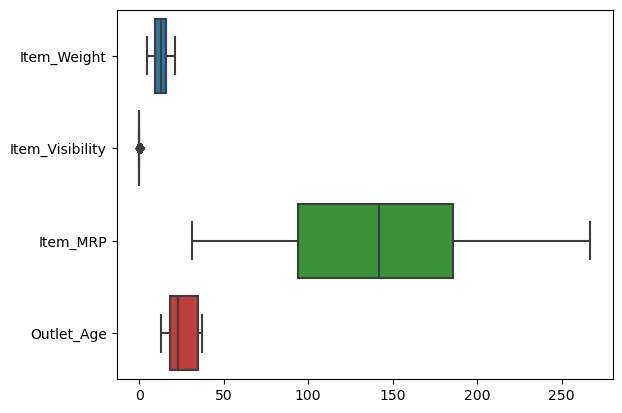

In [50]:
sns.boxplot(numcols,orient="h")

In [51]:
numcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age'], dtype='object')

In [52]:
numcols.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
Item_Weight,1.000000,-0.013641,0.033002,-0.000462
Item_Visibility,-0.013641,1.000000,-0.006351,0.083678
Item_MRP,0.033002,-0.006351,1.000000,-0.000141
Outlet_Age,-0.000462,0.083678,-0.000141,1.000000


In [53]:
objcols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Code'],
      dtype='object')

In [54]:
numcols['Item_Outlet_Sales']=objcols.Item_Outlet_Sales

In [55]:
objcols=objcols.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)

In [56]:
objcols.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,FD
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,DR
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,FD
3,Regular,Fruits and Vegetables,OUT010,missing,Tier 3,Grocery Store,FD
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,NC


In [57]:
objcols_dummy=pd.get_dummies(objcols)

In [58]:
objcols_dummy.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Code_DR,Item_Code_FD,Item_Code_NC
0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [59]:
objcols.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Code'],
      dtype='object')

In [60]:
combinedf_clean=pd.concat([numcols,objcols_dummy],axis=1)

split data back to train and test

In [61]:
salestrain_df=combinedf_clean[combinedf_clean.Item_Outlet_Sales!='test']
salestest_df=combinedf_clean[combinedf_clean.Item_Outlet_Sales=='test']

In [62]:
salestest_df=salestest_df.drop('Item_Outlet_Sales',axis=1)

In [63]:
print(salestrain_df.shape)
print(salestest_df.shape)

(8523, 48)
(5681, 47)


In [64]:
salestrain_df.Item_Outlet_Sales=salestrain_df.Item_Outlet_Sales.astype("float64")

C:\Users\swati\AppData\Local\Temp\ipykernel_16416\3838433963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salestrain_df.Item_Outlet_Sales=salestrain_df.Item_Outlet_Sales.astype("float64")


In [65]:
salestrain_df.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<Axes: ylabel='Density'>

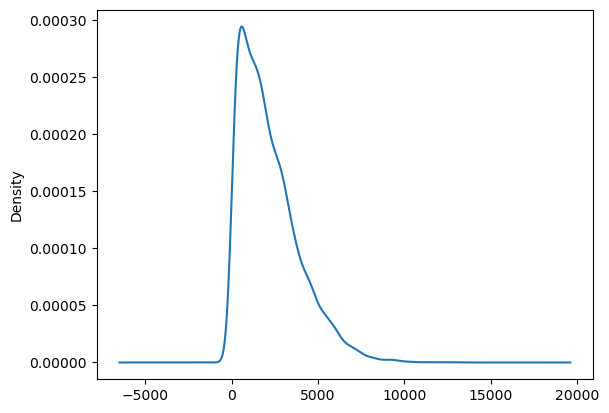

In [66]:
salestrain_df.Item_Outlet_Sales.plot(kind='density')

<Axes: ylabel='Frequency'>

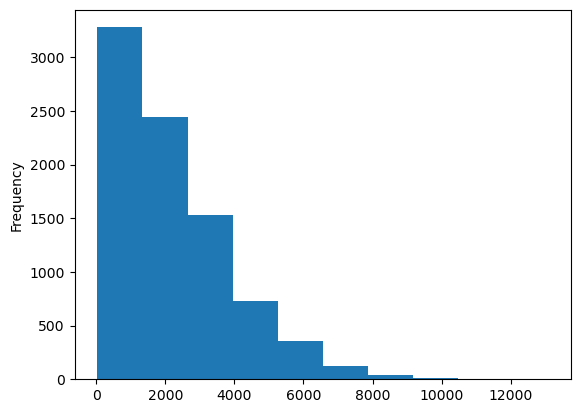

In [67]:
salestrain_df.Item_Outlet_Sales.plot(kind='hist')

<Axes: >

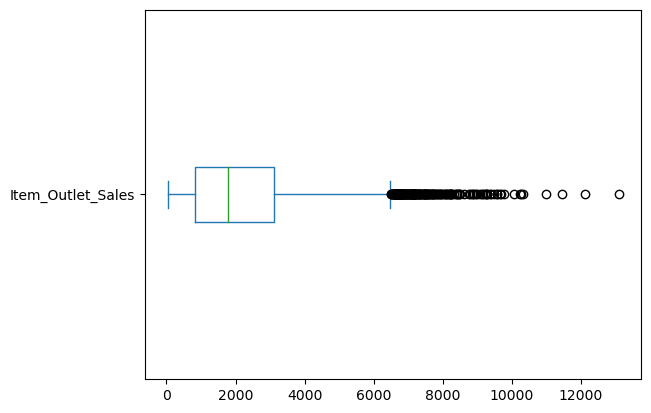

In [68]:
salestrain_df.Item_Outlet_Sales.plot(kind='box',vert=False)

<Axes: >

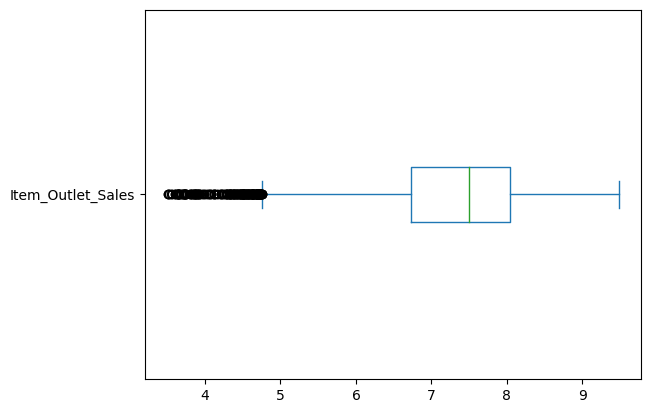

In [69]:
np.log(salestrain_df.Item_Outlet_Sales).plot(kind='box',vert=False)

In [70]:
y=salestrain_df.Item_Outlet_Sales
X=salestrain_df.drop('Item_Outlet_Sales',axis=1)

In [71]:
y=y.astype('float64')

In [73]:
from sklearn.linear_model import LinearRegression

In [75]:
reg=LinearRegression()

In [76]:
regmodel=reg.fit(X,y)

In [78]:
regmodel.score(X,y)

0.5638237262798411

In [79]:
regtestpredict=regmodel.predict(salestest_df)

In [80]:
pd.DataFrame(regtestpredict).to_csv("reg.csv")

Binary logestic regression
